In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense

from keras.utils import plot_model
from keras.utils import np_utils

from keras.callbacks import EarlyStopping
pd.set_option('display.max_columns', 500)


Using TensorFlow backend.


In [2]:
df = pd.read_csv('train/labels.csv')

In [3]:
df.head()

,index,fname,label,real_int,real_str
0,0,0.png,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0]","7, 1, 3, 1","Sneaker, Trouser, Dress, Trouser"
1,1,1.png,"[0, 0, 0, 0, 1, 0, 1, 1, 0, 0]","6, 7, 7, 4","Shirt, Sneaker, Sneaker, Coat"
2,2,2.png,"[1, 1, 0, 0, 0, 0, 0, 0, 1, 0]","8, 8, 0, 1","Bag, Bag, T-shirt/top, Trouser"
3,3,3.png,"[0, 1, 0, 0, 0, 1, 1, 0, 1, 0]","5, 6, 8, 1","Sandal, Shirt, Bag, Trouser"
4,4,4.png,"[1, 0, 0, 1, 0, 1, 0, 0, 0, 0]","5, 3, 0, 0","Sandal, Dress, T-shirt/top, T-shirt/top"


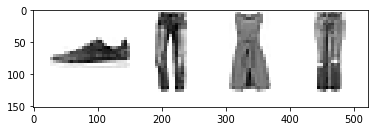

In [4]:
demo = plt.imread('train/0.png')
plt.imshow(demo)

In [5]:
################################################################################
# Read the data
################################################################################
raw_data = pd.read_csv('train/labels.csv')

print(raw_data)

print(" >>> ", len(raw_data))

raw_pic = []
raw_lbl = []

for i in range(0, len(raw_data)):
    item = raw_data.iloc[i]
    
    img_file = 'train/' + item['fname']
#     print(img_file)
    img = cv2.imread(img_file)

    y = 0
    h = 160
    x = int((646 - 640) / 2)
    w = 640 
    
    crop_img = img[y:y+h, x:x+w]
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    raw_pic.append(crop_img)
    
    lbl = item['label']
#     print(lbl)
    lbl_in_np = np.fromstring(lbl[1:-1], dtype=int, sep=',')
#     print(lbl_in_np)
    
    raw_lbl.append(lbl_in_np)

      index     fname                           label    real_int  \
0         0     0.png  [0, 1, 0, 1, 0, 0, 0, 1, 0, 0]  7, 1, 3, 1   
1         1     1.png  [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]  6, 7, 7, 4   
2         2     2.png  [1, 1, 0, 0, 0, 0, 0, 0, 1, 0]  8, 8, 0, 1   
3         3     3.png  [0, 1, 0, 0, 0, 1, 1, 0, 1, 0]  5, 6, 8, 1   
4         4     4.png  [1, 0, 0, 1, 0, 1, 0, 0, 0, 0]  5, 3, 0, 0   
5         5     5.png  [1, 1, 0, 0, 0, 0, 0, 1, 0, 0]  0, 1, 0, 7   
6         6     6.png  [0, 0, 1, 0, 0, 0, 1, 0, 1, 0]  6, 8, 2, 6   
7         7     7.png  [0, 0, 0, 0, 1, 1, 0, 1, 1, 0]  8, 4, 5, 7   
8         8     8.png  [0, 1, 0, 0, 0, 0, 0, 1, 0, 1]  7, 7, 1, 9   
9         9     9.png  [1, 0, 1, 0, 0, 0, 0, 1, 0, 0]  7, 2, 7, 0   
10       10    10.png  [0, 0, 0, 0, 1, 1, 0, 1, 1, 0]  8, 7, 4, 5   
11       11    11.png  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0]  8, 4, 4, 6   
12       12    12.png  [1, 0, 1, 0, 0, 0, 0, 1, 0, 0]  2, 7, 0, 0   
13       13    13.png  [0, 0, 0, 0

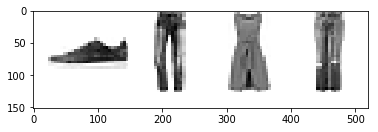

In [9]:
plt.imshow(raw_pic[0])

In [7]:
raw_lbl[0:5]

[array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0]),
 array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0]),
 array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0])]

In [10]:
#--- process image -------------------------------------------------------------
train_img = np.array(raw_pic)
print(" >>> train_img.shape = ", train_img.shape)
train_img_size_h = train_img.shape[1]
train_img_size_w = train_img.shape[2]
print(" >>> h = ", train_img_size_h)
print(" >>> w = ", train_img_size_w)

train_img = train_img.astype('float32') 
train_img /= 255

#--- preprocess label ----------------------------------------------------------
train_lbl = np.array(raw_lbl)
print(" >>> train_ans.shape = ", train_lbl.shape)

 >>> train_img.shape =  (10000, 151, 520, 3)
 >>> h =  151
 >>> w =  520
 >>> train_ans.shape =  (10000, 10)


In [11]:
################################################################################
# Build the model
################################################################################
input_shape_img = (train_img.shape[1], train_img.shape[2], 3)
batch_size = 32
num_epochs = 100
num_classes = 10
conv_size = 32

print(" >>> input_shape_img = ", input_shape_img)

#-------------------------------------------------------------------------------
model = Sequential()

model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same', input_shape=input_shape_img)) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(num_classes, activation='sigmoid'))

#-------------------------------------------------------------------------------
model.compile(loss='binary_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])
              
model.summary()

 >>> input_shape_img =  (151, 520, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 151, 520, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 260, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 260, 32)       9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 130, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 130, 32)       9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 65, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18

In [12]:
################################################################################
# Train the model
################################################################################
print(" >>> CNN Model Training ... \n")

early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
                                            
history = model.fit(train_img, train_lbl,
                        batch_size=batch_size,
                        epochs=num_epochs,
                        verbose=1,
                        validation_split=0.1,
                        callbacks=[early_stop])

 >>> CNN Model Training ... 

Train on 9000 samples, validate on 1000 samples
Epoch 1/100
9000/9000 [==============================] - 19s 2ms/step - loss: 0.6262 - acc: 0.6598 - val_loss: 0.6154 - val_acc: 0.6748
Epoch 2/100
9000/9000 [==============================] - 12s 1ms/step - loss: 0.4943 - acc: 0.7534 - val_loss: 0.4346 - val_acc: 0.7967
Epoch 3/100
9000/9000 [==============================] - 11s 1ms/step - loss: 0.3831 - acc: 0.8241 - val_loss: 0.3581 - val_acc: 0.8403
Epoch 4/100
9000/9000 [==============================] - 11s 1ms/step - loss: 0.3294 - acc: 0.8547 - val_loss: 0.3365 - val_acc: 0.8544
Epoch 5/100
9000/9000 [==============================] - 11s 1ms/step - loss: 0.2993 - acc: 0.8701 - val_loss: 0.3022 - val_acc: 0.8638
Epoch 6/100
9000/9000 [==============================] - 11s 1ms/step - loss: 0.2762 - acc: 0.8820 - val_loss: 0.2674 - val_acc: 0.8847
Epoch 7/100
9000/9000 [==============================] - 11s 1ms/step - loss: 0.2560 - acc: 0.8912 - val_l

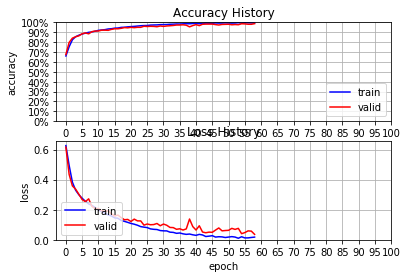

In [13]:
################################################################################
# Check the history
################################################################################
plt.figure(facecolor='white')

# accuracy ---------------------------------------------------------------------
ax1 = plt.subplot(2,1,1)

plt.plot([x * 100 for x in history.history['acc']], label="acc", color="blue")
plt.plot([x * 100 for x in history.history['val_acc']], label="val_acc", color="red")

plt.title('Accuracy History')
plt.ylabel('accuracy')
# plt.xlabel('epoch')

plt.legend(['train', 'valid'], loc='lower right')

plt.ylim(0, 1)
plt.xticks(np.arange(0, num_epochs + 1, 5))
plt.yticks(np.arange(0, 100.1, 10))
ax1.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.grid()

# loss -------------------------------------------------------------------------
plt.subplot(2,1,2)

plt.plot(history.history['loss'], label="loss", color="blue")
plt.plot(history.history['val_loss'], label="val_loss", color="red")

plt.title('Loss History')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'valid'], loc='lower left')

plt.ylim(0)
plt.xticks(np.arange(0, num_epochs + 1, 5))
plt.grid()
plt.show()


In [16]:
################################################################################
# Check the test dataset
################################################################################
t_data = pd.read_csv('test/labels.csv')

print(raw_data)

print(" >>> ", len(raw_data))

t_pic = []
t_lbl = []
t_int = []
t_str = []

for i in range(0, len(t_data)):
    item = t_data.iloc[i]
    
    img_file = 'test/' + item['fname']
#     print(img_file)
    img = cv2.imread(img_file)
    
    y = 0
    h = 160
    x = int((646 - 640) / 2)
    w = 640 
    
    crop_img = img[y:y+h, x:x+w]
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    t_pic.append(crop_img)
    
    lbl = item['label']
#     print(lbl)
    lbl_in_np = np.fromstring(lbl[1:-1], dtype=int, sep=',')
#     print(lbl_in_np)
    
    t_lbl.append(lbl_in_np)
    
    t_int.append(item['real_int'])
    t_str.append(item['real_str'])

      index     fname                           label    real_int  \
0         0     0.png  [0, 1, 0, 1, 0, 0, 0, 1, 0, 0]  7, 1, 3, 1   
1         1     1.png  [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]  6, 7, 7, 4   
2         2     2.png  [1, 1, 0, 0, 0, 0, 0, 0, 1, 0]  8, 8, 0, 1   
3         3     3.png  [0, 1, 0, 0, 0, 1, 1, 0, 1, 0]  5, 6, 8, 1   
4         4     4.png  [1, 0, 0, 1, 0, 1, 0, 0, 0, 0]  5, 3, 0, 0   
5         5     5.png  [1, 1, 0, 0, 0, 0, 0, 1, 0, 0]  0, 1, 0, 7   
6         6     6.png  [0, 0, 1, 0, 0, 0, 1, 0, 1, 0]  6, 8, 2, 6   
7         7     7.png  [0, 0, 0, 0, 1, 1, 0, 1, 1, 0]  8, 4, 5, 7   
8         8     8.png  [0, 1, 0, 0, 0, 0, 0, 1, 0, 1]  7, 7, 1, 9   
9         9     9.png  [1, 0, 1, 0, 0, 0, 0, 1, 0, 0]  7, 2, 7, 0   
10       10    10.png  [0, 0, 0, 0, 1, 1, 0, 1, 1, 0]  8, 7, 4, 5   
11       11    11.png  [0, 0, 0, 0, 1, 0, 1, 0, 1, 0]  8, 4, 4, 6   
12       12    12.png  [1, 0, 1, 0, 0, 0, 0, 1, 0, 0]  2, 7, 0, 0   
13       13    13.png  [0, 0, 0, 0

In [17]:
#--- process image -------------------------------------------------------------
test_img = np.array(t_pic)
print(" >>> test_img.shape = ", test_img.shape)

test_img = test_img.astype('float32') 
test_img /= 255

#--- preprocess label ----------------------------------------------------------
test_lbl = np.array(t_lbl)
print(" >>> test_lbl.shape = ", test_lbl.shape)

 >>> test_img.shape =  (1000, 151, 520, 3)
 >>> test_lbl.shape =  (1000, 10)


In [18]:
#--- evaluate ------------------------------------------------------------------
acc = model.evaluate(test_img, test_lbl, verbose=1)[1]
print(" >>> acc = ", acc)


1000/1000 [==============================] - 1s 767us/step
 >>> acc =  0.890899986743927


 >>> size(gap_weights) =  320
 >>> K.int_shape(model.layers[-3].output) =  (None, 4, 16, 32)
 >>> K.int_shape(model.layers[-1].output) =  (None, 10)


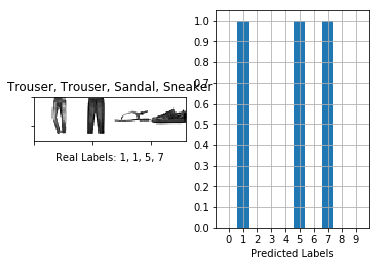

 >>>  [1.0154053e-04 1.0000000e+00 2.6887299e-06 6.2431238e-10 1.9245968e-07
 1.0000000e+00 4.7033318e-05 1.0000000e+00 8.3392410e-04 5.6870476e-08]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.00010154053
 (n, v) =  1 1.0
 (n, v) =  2 2.6887299e-06
 (n, v) =  3 6.243124e-10
 (n, v) =  4 1.9245968e-07
 (n, v) =  5 1.0
 (n, v) =  6 4.7033318e-05
 (n, v) =  7 1.0
 (n, v) =  8 0.0008339241
 (n, v) =  9 5.6870476e-08
 (x) =  [3 9 4 2 6 0 8 1 5 7]
 >>> i =  1  pred =  7
 >>> i =  2  pred =  5
 >>> i =  3  pred =  1
 >>> i =  4  pred =  8


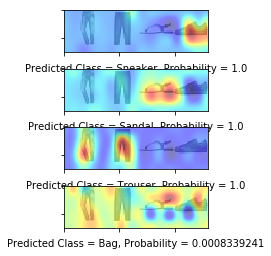

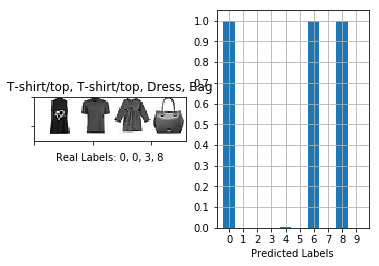

 >>>  [1.0000000e+00 3.8892582e-09 6.9437300e-07 7.1942154e-09 2.8036213e-03
 1.5443098e-07 9.9999416e-01 3.1453484e-09 1.0000000e+00 9.2399342e-09]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 1.0
 (n, v) =  1 3.8892582e-09
 (n, v) =  2 6.94373e-07
 (n, v) =  3 7.1942154e-09
 (n, v) =  4 0.0028036213
 (n, v) =  5 1.5443098e-07
 (n, v) =  6 0.99999416
 (n, v) =  7 3.1453484e-09
 (n, v) =  8 1.0
 (n, v) =  9 9.239934e-09
 (x) =  [7 1 3 9 5 2 4 6 0 8]
 >>> i =  1  pred =  8
 >>> i =  2  pred =  0
 >>> i =  3  pred =  6
 >>> i =  4  pred =  4


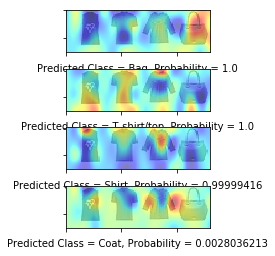

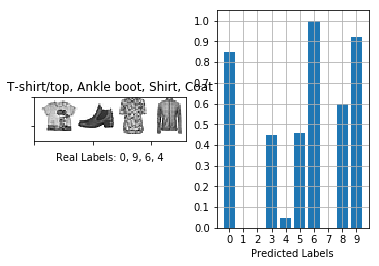

 >>>  [8.4990740e-01 9.2313943e-12 1.8262700e-08 4.4743133e-01 4.6277862e-02
 4.6004587e-01 9.9994850e-01 1.5168288e-08 5.9925228e-01 9.1939521e-01]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.8499074
 (n, v) =  1 9.231394e-12
 (n, v) =  2 1.82627e-08
 (n, v) =  3 0.44743133
 (n, v) =  4 0.046277862
 (n, v) =  5 0.46004587
 (n, v) =  6 0.9999485
 (n, v) =  7 1.5168288e-08
 (n, v) =  8 0.5992523
 (n, v) =  9 0.9193952
 (x) =  [1 7 2 4 3 5 8 0 9 6]
 >>> i =  1  pred =  6
 >>> i =  2  pred =  9
 >>> i =  3  pred =  0
 >>> i =  4  pred =  8


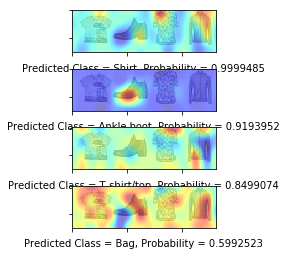

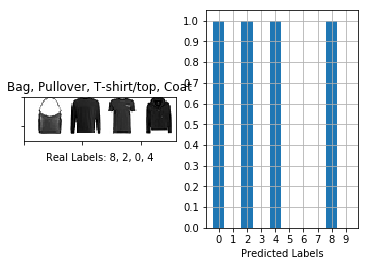

 >>>  [9.9999368e-01 4.0424527e-13 1.0000000e+00 9.4523085e-07 9.9998021e-01
 2.2791315e-13 6.3111924e-04 1.0495296e-05 9.9995673e-01 3.0273098e-10]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.9999937
 (n, v) =  1 4.0424527e-13
 (n, v) =  2 1.0
 (n, v) =  3 9.4523085e-07
 (n, v) =  4 0.9999802
 (n, v) =  5 2.2791315e-13
 (n, v) =  6 0.00063111924
 (n, v) =  7 1.0495296e-05
 (n, v) =  8 0.9999567
 (n, v) =  9 3.0273098e-10
 (x) =  [5 1 9 3 7 6 8 4 0 2]
 >>> i =  1  pred =  2
 >>> i =  2  pred =  0
 >>> i =  3  pred =  4
 >>> i =  4  pred =  8


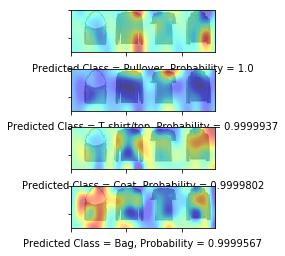

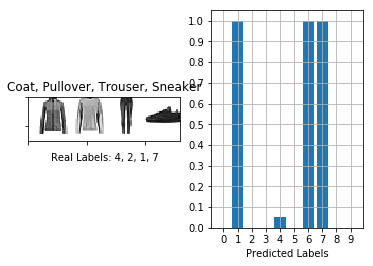

 >>>  [5.9673962e-06 1.0000000e+00 2.9029232e-04 1.1846437e-03 5.4412674e-02
 8.5083059e-11 9.9981135e-01 1.0000000e+00 6.6964702e-08 1.5958530e-09]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 5.967396e-06
 (n, v) =  1 1.0
 (n, v) =  2 0.00029029232
 (n, v) =  3 0.0011846437
 (n, v) =  4 0.054412674
 (n, v) =  5 8.508306e-11
 (n, v) =  6 0.99981135
 (n, v) =  7 1.0
 (n, v) =  8 6.69647e-08
 (n, v) =  9 1.595853e-09
 (x) =  [5 9 8 0 2 3 4 6 1 7]
 >>> i =  1  pred =  7
 >>> i =  2  pred =  1
 >>> i =  3  pred =  6
 >>> i =  4  pred =  4


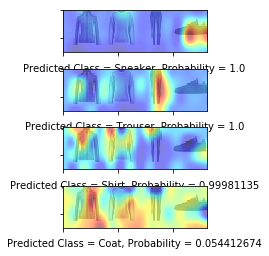

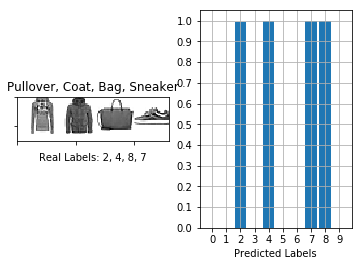

 >>>  [7.1579436e-09 1.3830819e-11 9.9518627e-01 5.1942962e-04 9.9991274e-01
 5.2310838e-06 4.6291902e-06 1.0000000e+00 1.0000000e+00 5.8369393e-10]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 7.1579436e-09
 (n, v) =  1 1.3830819e-11
 (n, v) =  2 0.99518627
 (n, v) =  3 0.0005194296
 (n, v) =  4 0.99991274
 (n, v) =  5 5.231084e-06
 (n, v) =  6 4.6291902e-06
 (n, v) =  7 1.0
 (n, v) =  8 1.0
 (n, v) =  9 5.836939e-10
 (x) =  [1 9 0 6 5 3 2 4 7 8]
 >>> i =  1  pred =  8
 >>> i =  2  pred =  7
 >>> i =  3  pred =  4
 >>> i =  4  pred =  2


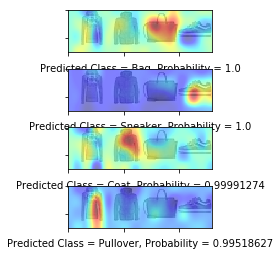

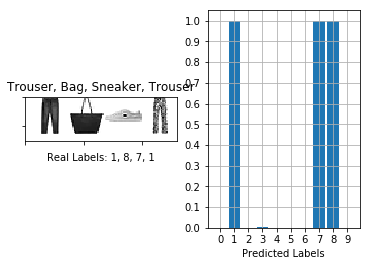

 >>>  [5.3566921e-04 1.0000000e+00 1.1431073e-05 4.6229726e-03 8.1474385e-12
 3.2580804e-13 1.7156661e-04 1.0000000e+00 1.0000000e+00 1.5621256e-10]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.0005356692
 (n, v) =  1 1.0
 (n, v) =  2 1.1431073e-05
 (n, v) =  3 0.0046229726
 (n, v) =  4 8.1474385e-12
 (n, v) =  5 3.2580804e-13
 (n, v) =  6 0.00017156661
 (n, v) =  7 1.0
 (n, v) =  8 1.0
 (n, v) =  9 1.5621256e-10
 (x) =  [5 4 9 2 6 0 3 1 7 8]
 >>> i =  1  pred =  8
 >>> i =  2  pred =  7
 >>> i =  3  pred =  1
 >>> i =  4  pred =  3


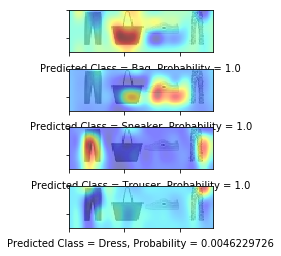

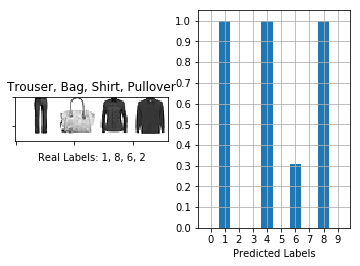

 >>>  [5.3910259e-04 1.0000000e+00 2.9960898e-05 3.0955687e-04 9.9999917e-01
 2.2294886e-09 3.0971950e-01 1.5622403e-08 9.9999774e-01 3.7036882e-09]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.0005391026
 (n, v) =  1 1.0
 (n, v) =  2 2.9960898e-05
 (n, v) =  3 0.00030955687
 (n, v) =  4 0.99999917
 (n, v) =  5 2.2294886e-09
 (n, v) =  6 0.3097195
 (n, v) =  7 1.5622403e-08
 (n, v) =  8 0.99999774
 (n, v) =  9 3.7036882e-09
 (x) =  [5 9 7 2 3 0 6 8 4 1]
 >>> i =  1  pred =  1
 >>> i =  2  pred =  4
 >>> i =  3  pred =  8
 >>> i =  4  pred =  6


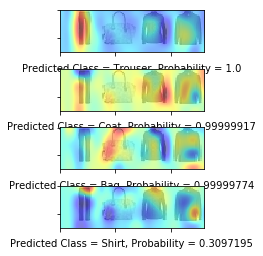

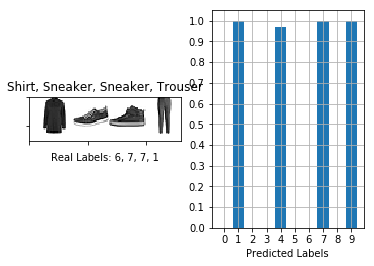

 >>>  [2.6383227e-06 1.0000000e+00 5.1520619e-06 6.9667994e-06 9.7056949e-01
 1.3185721e-13 3.8371445e-04 1.0000000e+00 5.6135588e-05 9.9994981e-01]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 2.6383227e-06
 (n, v) =  1 1.0
 (n, v) =  2 5.152062e-06
 (n, v) =  3 6.9667994e-06
 (n, v) =  4 0.9705695
 (n, v) =  5 1.3185721e-13
 (n, v) =  6 0.00038371445
 (n, v) =  7 1.0
 (n, v) =  8 5.613559e-05
 (n, v) =  9 0.9999498
 (x) =  [5 0 2 3 8 6 4 9 1 7]
 >>> i =  1  pred =  7
 >>> i =  2  pred =  1
 >>> i =  3  pred =  9
 >>> i =  4  pred =  4


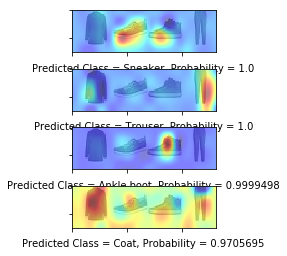

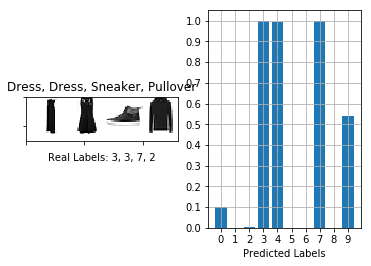

 >>>  [1.0262028e-01 4.2183515e-07 4.5413235e-03 1.0000000e+00 9.9617863e-01
 8.7035690e-10 5.3370968e-06 1.0000000e+00 1.1597184e-07 5.3944236e-01]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.10262028
 (n, v) =  1 4.2183515e-07
 (n, v) =  2 0.0045413235
 (n, v) =  3 1.0
 (n, v) =  4 0.9961786
 (n, v) =  5 8.703569e-10
 (n, v) =  6 5.337097e-06
 (n, v) =  7 1.0
 (n, v) =  8 1.1597184e-07
 (n, v) =  9 0.53944236
 (x) =  [5 8 1 6 2 0 9 4 3 7]
 >>> i =  1  pred =  7
 >>> i =  2  pred =  3
 >>> i =  3  pred =  4
 >>> i =  4  pred =  9


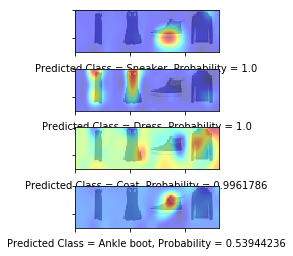

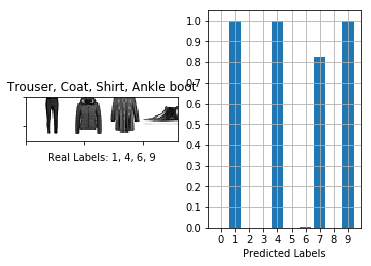

 >>>  [1.2916370e-06 1.0000000e+00 2.1213505e-06 5.7859182e-07 1.0000000e+00
 1.4665462e-06 2.7866340e-03 8.2705361e-01 3.6564282e-07 9.9622935e-01]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 1.291637e-06
 (n, v) =  1 1.0
 (n, v) =  2 2.1213505e-06
 (n, v) =  3 5.785918e-07
 (n, v) =  4 1.0
 (n, v) =  5 1.4665462e-06
 (n, v) =  6 0.002786634
 (n, v) =  7 0.8270536
 (n, v) =  8 3.6564282e-07
 (n, v) =  9 0.99622935
 (x) =  [8 3 0 5 2 6 7 9 1 4]
 >>> i =  1  pred =  4
 >>> i =  2  pred =  1
 >>> i =  3  pred =  9
 >>> i =  4  pred =  7


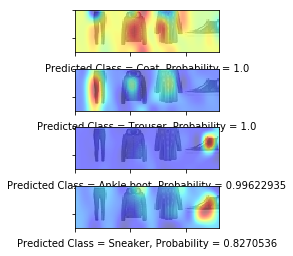

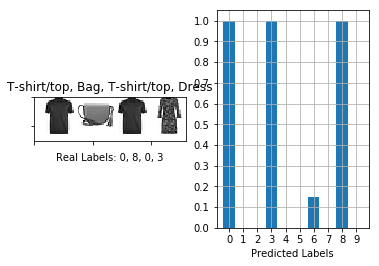

 >>>  [1.0000000e+00 8.5296161e-09 2.7672544e-07 9.9987662e-01 6.1385877e-06
 3.1476975e-07 1.4813368e-01 7.5827991e-08 9.9992144e-01 2.9649477e-10]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 1.0
 (n, v) =  1 8.529616e-09
 (n, v) =  2 2.7672544e-07
 (n, v) =  3 0.9998766
 (n, v) =  4 6.1385877e-06
 (n, v) =  5 3.1476975e-07
 (n, v) =  6 0.14813368
 (n, v) =  7 7.582799e-08
 (n, v) =  8 0.99992144
 (n, v) =  9 2.9649477e-10
 (x) =  [9 1 7 2 5 4 6 3 8 0]
 >>> i =  1  pred =  0
 >>> i =  2  pred =  8
 >>> i =  3  pred =  3
 >>> i =  4  pred =  6


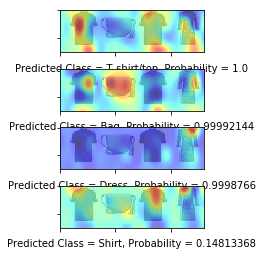

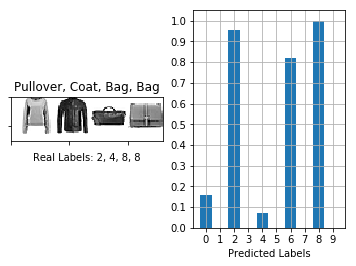

 >>>  [1.5933509e-01 3.3267369e-04 9.5721072e-01 6.3887347e-11 7.0527218e-02
 8.5870448e-07 8.1947464e-01 3.2574375e-04 1.0000000e+00 2.1967027e-10]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.15933509
 (n, v) =  1 0.0003326737
 (n, v) =  2 0.9572107
 (n, v) =  3 6.388735e-11
 (n, v) =  4 0.07052722
 (n, v) =  5 8.587045e-07
 (n, v) =  6 0.81947464
 (n, v) =  7 0.00032574375
 (n, v) =  8 1.0
 (n, v) =  9 2.1967027e-10
 (x) =  [3 9 5 7 1 4 0 6 2 8]
 >>> i =  1  pred =  8
 >>> i =  2  pred =  2
 >>> i =  3  pred =  6
 >>> i =  4  pred =  0


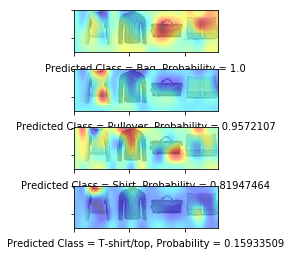

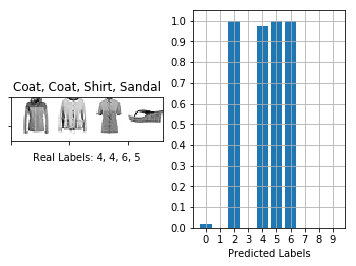

 >>>  [1.8788463e-02 3.6224808e-11 9.9956805e-01 1.1164625e-06 9.7483319e-01
 9.9999976e-01 9.9713528e-01 1.1272819e-03 6.2173523e-05 1.5616280e-10]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.018788463
 (n, v) =  1 3.6224808e-11
 (n, v) =  2 0.99956805
 (n, v) =  3 1.1164625e-06
 (n, v) =  4 0.9748332
 (n, v) =  5 0.99999976
 (n, v) =  6 0.9971353
 (n, v) =  7 0.0011272819
 (n, v) =  8 6.217352e-05
 (n, v) =  9 1.561628e-10
 (x) =  [1 9 3 8 7 0 4 6 2 5]
 >>> i =  1  pred =  5
 >>> i =  2  pred =  2
 >>> i =  3  pred =  6
 >>> i =  4  pred =  4


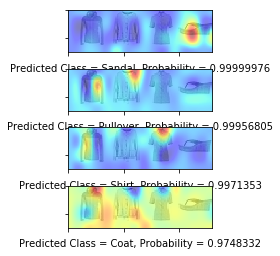

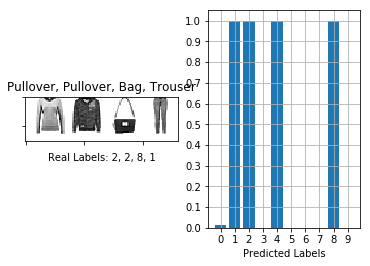

 >>>  [1.4372403e-02 1.0000000e+00 1.0000000e+00 3.6513720e-06 9.9960619e-01
 1.6287194e-06 8.6085294e-08 9.1716595e-07 1.0000000e+00 4.0876222e-10]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.014372403
 (n, v) =  1 1.0
 (n, v) =  2 1.0
 (n, v) =  3 3.651372e-06
 (n, v) =  4 0.9996062
 (n, v) =  5 1.6287194e-06
 (n, v) =  6 8.6085294e-08
 (n, v) =  7 9.1716595e-07
 (n, v) =  8 1.0
 (n, v) =  9 4.0876222e-10
 (x) =  [9 6 7 5 3 0 4 1 2 8]
 >>> i =  1  pred =  8
 >>> i =  2  pred =  2
 >>> i =  3  pred =  1
 >>> i =  4  pred =  4


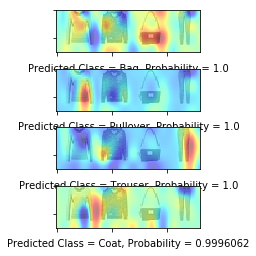

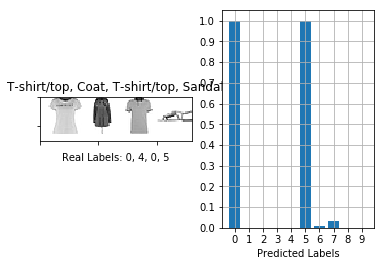

 >>>  [1.0000000e+00 5.8562731e-11 3.4497752e-05 2.5631327e-05 1.9706689e-05
 1.0000000e+00 6.8970611e-03 3.2555420e-02 1.2777432e-09 1.9376277e-08]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 1.0
 (n, v) =  1 5.856273e-11
 (n, v) =  2 3.4497752e-05
 (n, v) =  3 2.5631327e-05
 (n, v) =  4 1.970669e-05
 (n, v) =  5 1.0
 (n, v) =  6 0.006897061
 (n, v) =  7 0.03255542
 (n, v) =  8 1.2777432e-09
 (n, v) =  9 1.9376277e-08
 (x) =  [1 8 9 4 3 2 6 7 0 5]
 >>> i =  1  pred =  5
 >>> i =  2  pred =  0
 >>> i =  3  pred =  7
 >>> i =  4  pred =  6


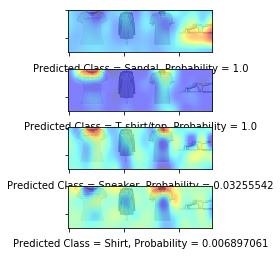

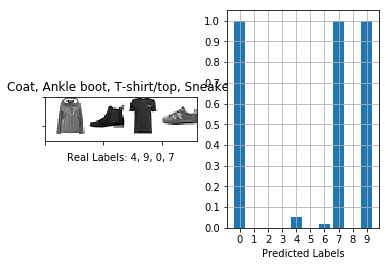

 >>>  [9.9999726e-01 7.8541037e-13 7.7879722e-06 8.3230925e-06 5.3820889e-02
 3.3808684e-10 1.8356346e-02 9.9999952e-01 2.6910052e-06 1.0000000e+00]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.99999726
 (n, v) =  1 7.8541037e-13
 (n, v) =  2 7.787972e-06
 (n, v) =  3 8.3230925e-06
 (n, v) =  4 0.05382089
 (n, v) =  5 3.3808684e-10
 (n, v) =  6 0.018356346
 (n, v) =  7 0.9999995
 (n, v) =  8 2.6910052e-06
 (n, v) =  9 1.0
 (x) =  [1 5 8 2 3 6 4 0 7 9]
 >>> i =  1  pred =  9
 >>> i =  2  pred =  7
 >>> i =  3  pred =  0
 >>> i =  4  pred =  4


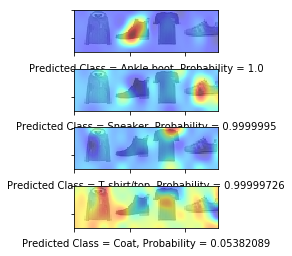

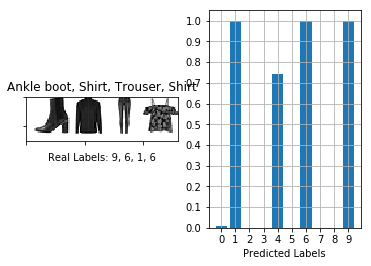

 >>>  [8.7180324e-03 1.0000000e+00 8.0800572e-05 8.6045207e-09 7.4149984e-01
 1.1112347e-03 9.9776518e-01 1.7005060e-07 1.8009737e-07 9.9983466e-01]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.008718032
 (n, v) =  1 1.0
 (n, v) =  2 8.080057e-05
 (n, v) =  3 8.604521e-09
 (n, v) =  4 0.74149984
 (n, v) =  5 0.0011112347
 (n, v) =  6 0.9977652
 (n, v) =  7 1.700506e-07
 (n, v) =  8 1.8009737e-07
 (n, v) =  9 0.99983466
 (x) =  [3 7 8 2 5 0 4 6 9 1]
 >>> i =  1  pred =  1
 >>> i =  2  pred =  9
 >>> i =  3  pred =  6
 >>> i =  4  pred =  4


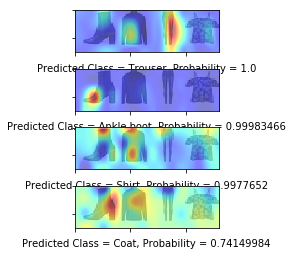

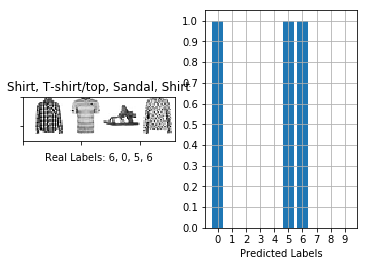

 >>>  [9.9724209e-01 7.3895473e-12 3.7848705e-04 1.1383916e-06 5.0398092e-05
 9.9884319e-01 1.0000000e+00 1.0319896e-11 1.8276001e-05 6.7978151e-11]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.9972421
 (n, v) =  1 7.389547e-12
 (n, v) =  2 0.00037848705
 (n, v) =  3 1.1383916e-06
 (n, v) =  4 5.0398092e-05
 (n, v) =  5 0.9988432
 (n, v) =  6 1.0
 (n, v) =  7 1.0319896e-11
 (n, v) =  8 1.8276001e-05
 (n, v) =  9 6.797815e-11
 (x) =  [1 7 9 3 8 4 2 0 5 6]
 >>> i =  1  pred =  6
 >>> i =  2  pred =  5
 >>> i =  3  pred =  0
 >>> i =  4  pred =  2


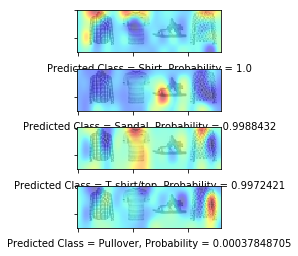

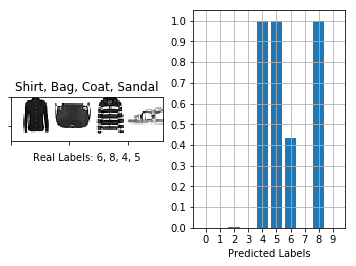

 >>>  [3.6874499e-05 1.0919942e-06 1.4657121e-03 5.4856955e-09 9.9998593e-01
 9.9999988e-01 4.3397596e-01 6.6422035e-05 1.0000000e+00 2.3162638e-13]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 3.68745e-05
 (n, v) =  1 1.0919942e-06
 (n, v) =  2 0.0014657121
 (n, v) =  3 5.4856955e-09
 (n, v) =  4 0.99998593
 (n, v) =  5 0.9999999
 (n, v) =  6 0.43397596
 (n, v) =  7 6.6422035e-05
 (n, v) =  8 1.0
 (n, v) =  9 2.3162638e-13
 (x) =  [9 3 1 0 7 2 6 4 5 8]
 >>> i =  1  pred =  8
 >>> i =  2  pred =  5
 >>> i =  3  pred =  4
 >>> i =  4  pred =  6


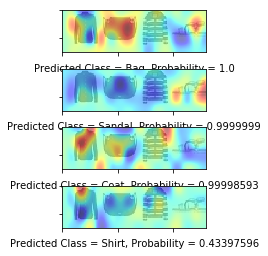

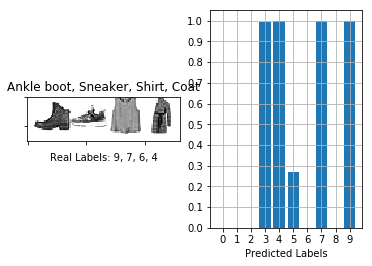

 >>>  [9.7900594e-04 6.9611851e-11 1.2757005e-06 9.9509525e-01 9.9990940e-01
 2.6957351e-01 8.5265760e-04 1.0000000e+00 9.3073482e-05 9.9990928e-01]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.0009790059
 (n, v) =  1 6.961185e-11
 (n, v) =  2 1.2757005e-06
 (n, v) =  3 0.99509525
 (n, v) =  4 0.9999094
 (n, v) =  5 0.2695735
 (n, v) =  6 0.0008526576
 (n, v) =  7 1.0
 (n, v) =  8 9.307348e-05
 (n, v) =  9 0.9999093
 (x) =  [1 2 8 6 0 5 3 9 4 7]
 >>> i =  1  pred =  7
 >>> i =  2  pred =  4
 >>> i =  3  pred =  9
 >>> i =  4  pred =  3


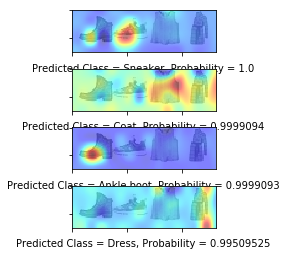

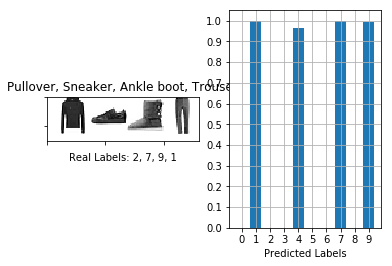

 >>>  [3.5405374e-06 1.0000000e+00 1.0947009e-03 4.3592404e-06 9.6447468e-01
 5.5339768e-08 9.0745458e-04 1.0000000e+00 2.5237987e-09 9.9170166e-01]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 3.5405374e-06
 (n, v) =  1 1.0
 (n, v) =  2 0.0010947009
 (n, v) =  3 4.3592404e-06
 (n, v) =  4 0.9644747
 (n, v) =  5 5.533977e-08
 (n, v) =  6 0.0009074546
 (n, v) =  7 1.0
 (n, v) =  8 2.5237987e-09
 (n, v) =  9 0.99170166
 (x) =  [8 5 0 3 6 2 4 9 1 7]
 >>> i =  1  pred =  7
 >>> i =  2  pred =  1
 >>> i =  3  pred =  9
 >>> i =  4  pred =  4


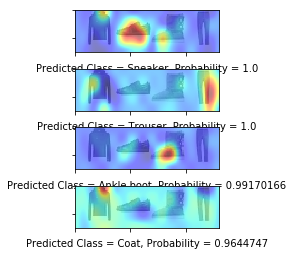

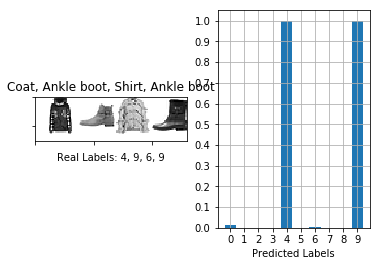

 >>>  [1.5816730e-02 1.2154451e-15 9.5825072e-04 2.1038279e-05 9.9991488e-01
 8.0733844e-06 1.9182249e-03 1.2507032e-10 1.0936840e-05 1.0000000e+00]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.01581673
 (n, v) =  1 1.2154451e-15
 (n, v) =  2 0.0009582507
 (n, v) =  3 2.1038279e-05
 (n, v) =  4 0.9999149
 (n, v) =  5 8.073384e-06
 (n, v) =  6 0.0019182249
 (n, v) =  7 1.2507032e-10
 (n, v) =  8 1.093684e-05
 (n, v) =  9 1.0
 (x) =  [1 7 5 8 3 2 6 0 4 9]
 >>> i =  1  pred =  9
 >>> i =  2  pred =  4
 >>> i =  3  pred =  0
 >>> i =  4  pred =  6


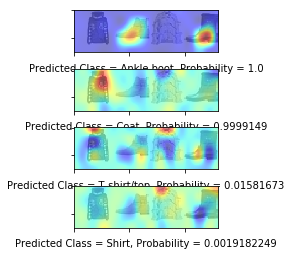

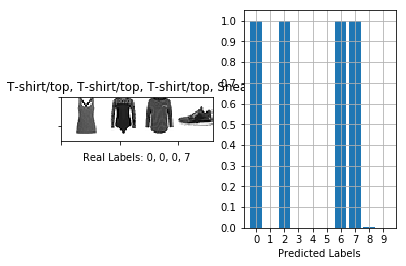

 >>>  [9.9878627e-01 6.0334617e-07 9.9999785e-01 4.5933584e-06 2.2293632e-11
 2.6830122e-08 9.9991131e-01 1.0000000e+00 3.5022418e-03 4.3406927e-09]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.9987863
 (n, v) =  1 6.0334617e-07
 (n, v) =  2 0.99999785
 (n, v) =  3 4.5933584e-06
 (n, v) =  4 2.2293632e-11
 (n, v) =  5 2.6830122e-08
 (n, v) =  6 0.9999113
 (n, v) =  7 1.0
 (n, v) =  8 0.0035022418
 (n, v) =  9 4.3406927e-09
 (x) =  [4 9 5 1 3 8 0 6 2 7]
 >>> i =  1  pred =  7
 >>> i =  2  pred =  2
 >>> i =  3  pred =  6
 >>> i =  4  pred =  0


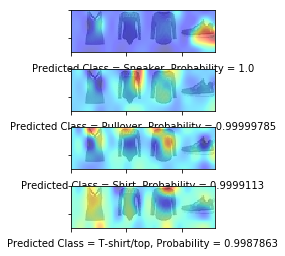

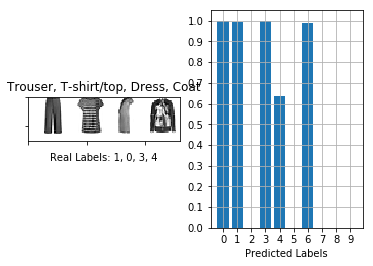

 >>>  [9.9999869e-01 9.9550784e-01 4.0479648e-05 9.9995744e-01 6.3630652e-01
 6.6823326e-08 9.8712015e-01 8.3383583e-08 9.4213910e-06 2.4911482e-09]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.9999987
 (n, v) =  1 0.99550784
 (n, v) =  2 4.047965e-05
 (n, v) =  3 0.99995744
 (n, v) =  4 0.6363065
 (n, v) =  5 6.6823326e-08
 (n, v) =  6 0.98712015
 (n, v) =  7 8.338358e-08
 (n, v) =  8 9.421391e-06
 (n, v) =  9 2.4911482e-09
 (x) =  [9 5 7 8 2 4 6 1 3 0]
 >>> i =  1  pred =  0
 >>> i =  2  pred =  3
 >>> i =  3  pred =  1
 >>> i =  4  pred =  6


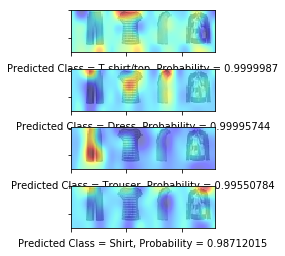

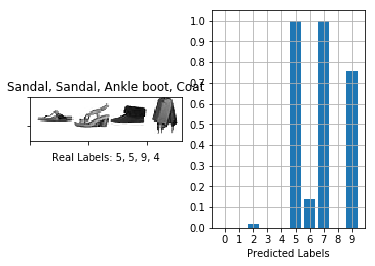

 >>>  [7.8173271e-06 1.2556002e-05 1.7344696e-02 3.6029849e-08 6.2432264e-05
 1.0000000e+00 1.3750044e-01 1.0000000e+00 4.6916110e-08 7.5608289e-01]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 7.817327e-06
 (n, v) =  1 1.2556002e-05
 (n, v) =  2 0.017344696
 (n, v) =  3 3.602985e-08
 (n, v) =  4 6.2432264e-05
 (n, v) =  5 1.0
 (n, v) =  6 0.13750044
 (n, v) =  7 1.0
 (n, v) =  8 4.691611e-08
 (n, v) =  9 0.7560829
 (x) =  [3 8 0 1 4 2 6 9 5 7]
 >>> i =  1  pred =  7
 >>> i =  2  pred =  5
 >>> i =  3  pred =  9
 >>> i =  4  pred =  6


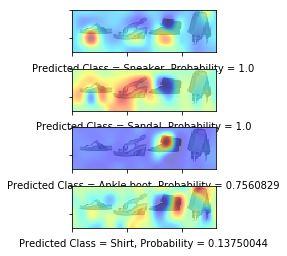

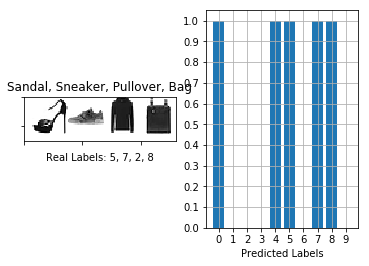

 >>>  [9.9930584e-01 1.8298840e-10 4.9879914e-06 2.3877260e-09 9.9999964e-01
 1.0000000e+00 2.1747342e-06 1.0000000e+00 9.9896860e-01 9.7251796e-13]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.99930584
 (n, v) =  1 1.829884e-10
 (n, v) =  2 4.9879914e-06
 (n, v) =  3 2.387726e-09
 (n, v) =  4 0.99999964
 (n, v) =  5 1.0
 (n, v) =  6 2.1747342e-06
 (n, v) =  7 1.0
 (n, v) =  8 0.9989686
 (n, v) =  9 9.72518e-13
 (x) =  [9 1 3 6 2 8 0 4 5 7]
 >>> i =  1  pred =  7
 >>> i =  2  pred =  5
 >>> i =  3  pred =  4
 >>> i =  4  pred =  0


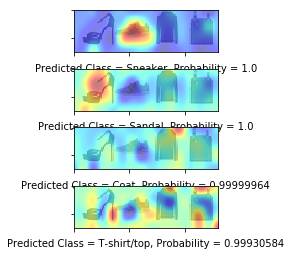

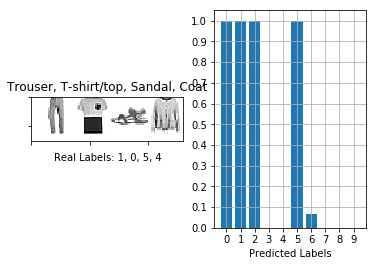

 >>>  [9.9998856e-01 1.0000000e+00 9.9924171e-01 1.3014468e-09 1.7344076e-04
 1.0000000e+00 6.8842553e-02 8.2819718e-10 1.7643636e-06 3.9806516e-10]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.99998856
 (n, v) =  1 1.0
 (n, v) =  2 0.9992417
 (n, v) =  3 1.3014468e-09
 (n, v) =  4 0.00017344076
 (n, v) =  5 1.0
 (n, v) =  6 0.06884255
 (n, v) =  7 8.281972e-10
 (n, v) =  8 1.7643636e-06
 (n, v) =  9 3.9806516e-10
 (x) =  [9 7 3 8 4 6 2 0 1 5]
 >>> i =  1  pred =  5
 >>> i =  2  pred =  1
 >>> i =  3  pred =  0
 >>> i =  4  pred =  2


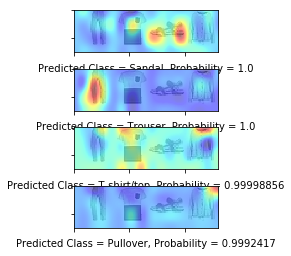

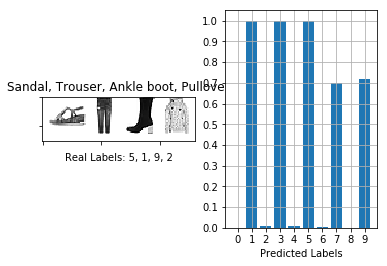

 >>>  [4.0547764e-07 9.9999988e-01 7.7780890e-03 9.9999881e-01 1.0599983e-02
 9.9998927e-01 1.9110924e-03 6.9857502e-01 4.6176608e-11 7.1743590e-01]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 4.0547764e-07
 (n, v) =  1 0.9999999
 (n, v) =  2 0.007778089
 (n, v) =  3 0.9999988
 (n, v) =  4 0.010599983
 (n, v) =  5 0.9999893
 (n, v) =  6 0.0019110924
 (n, v) =  7 0.698575
 (n, v) =  8 4.6176608e-11
 (n, v) =  9 0.7174359
 (x) =  [8 0 6 2 4 7 9 5 3 1]
 >>> i =  1  pred =  1
 >>> i =  2  pred =  3
 >>> i =  3  pred =  5
 >>> i =  4  pred =  9


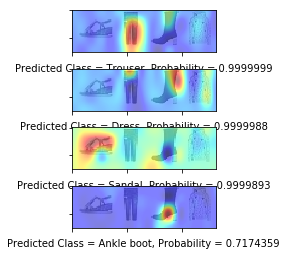

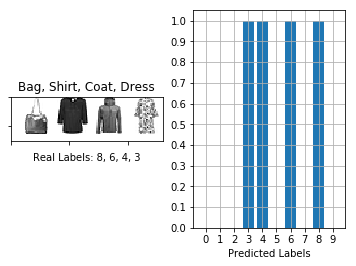

 >>>  [5.8108557e-04 3.6620494e-12 2.1756787e-04 9.9996197e-01 9.9899620e-01
 5.2950202e-07 9.9814665e-01 2.6335883e-08 9.9990451e-01 4.6038515e-08]
 >>> features[idx].shape =  (4, 16, 32)
 >>> features_for_one_img.shape =  (4, 16, 32)
 >>> features_for_one_img.shape[0] =  4
 >>> features_for_one_img.shape[1] =  16
 >>> height_roomout =  37.75  width_roomout =  32.5
 >>> after resize =  (151, 520, 32)
 (n, v) =  0 0.00058108557
 (n, v) =  1 3.6620494e-12
 (n, v) =  2 0.00021756787
 (n, v) =  3 0.999962
 (n, v) =  4 0.9989962
 (n, v) =  5 5.29502e-07
 (n, v) =  6 0.99814665
 (n, v) =  7 2.6335883e-08
 (n, v) =  8 0.9999045
 (n, v) =  9 4.6038515e-08
 (x) =  [1 7 9 5 2 0 6 4 8 3]
 >>> i =  1  pred =  3
 >>> i =  2  pred =  8
 >>> i =  3  pred =  4
 >>> i =  4  pred =  6


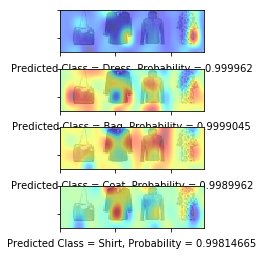

In [19]:
#--- create the new model ------------------------------------------------------
from keras.models import Model
from keras import backend as K
import scipy

gap_weights = model.layers[-1].get_weights()[0]
print(" >>> size(gap_weights) = ", gap_weights.size)

cam_model = Model(inputs=model.input, 
                    outputs=(model.layers[-3].output, model.layers[-1].output)) 
print(" >>> K.int_shape(model.layers[-3].output) = ", K.int_shape(model.layers[-3].output))
print(" >>> K.int_shape(model.layers[-1].output) = ", K.int_shape(model.layers[-1].output))

#--- make the prediction
features, results = cam_model.predict(test_img)

fashion_name = ['T-shirt/top',
                'Trouser',
                'Pullover',
                'Dress',
                'Coat',
                'Sandal',
                'Shirt',
                'Sneaker',
                'Bag',
                'Ankle boot']

#--- check the prediction for 10 test images
for idx in range(30):
    plt.figure(facecolor='white')
    
    ax = plt.subplot(1, 2, 1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.imshow(t_pic[idx])
    
    plt.xlabel("Real Labels: " + t_int[idx])
    plt.title(t_str[idx])
    
    plt.subplot(1, 2, 2)
    plt.bar(range(10), results[idx])
    plt.xticks(np.arange(0, 9.1, 1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Predicted Labels")
    plt.grid()
    
    plt.show()        
    
    print(" >>> ", results[idx])
    
    print(" >>> features[idx].shape = ", features[idx].shape)
    
    features_for_one_img = features[idx, :, :, :]
    print(" >>> features_for_one_img.shape = ", features_for_one_img.shape)
    print(" >>> features_for_one_img.shape[0] = ", features_for_one_img.shape[0])
    print(" >>> features_for_one_img.shape[1] = ", features_for_one_img.shape[1])

    height_roomout = train_img_size_h / features_for_one_img.shape[0]
    width_roomout = train_img_size_w / features_for_one_img.shape[1]
    
    print(" >>> height_roomout = ", height_roomout, " width_roomout = ", width_roomout)
    
    cam_features = scipy.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    
    print(" >>> after resize = ", cam_features.shape)
    
    for n, v in enumerate(results[idx]):
        print(" (n, v) = ", n , v)
        
    x = np.argsort(results[idx])
    print(" (x) = ", x)
    
    plt.figure(facecolor='white')
    
    for i in range(1, 5):
        
        pred = x[0-i]
        print(" >>> i = ", i, " pred = ", pred)
        
        cam_weights = gap_weights[:, pred]

        cam_output = np.dot(cam_features, cam_weights)
        
        ax = plt.subplot(4, 1, i)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        buf = 'Predicted Class = ' + fashion_name[pred] + ', Probability = ' + str(results[idx][pred])
        plt.xlabel(buf)
        
        plt.imshow(t_pic[idx], alpha=0.5)
        plt.imshow(cam_output, cmap='jet', alpha=0.5)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
     
    plt.show()  

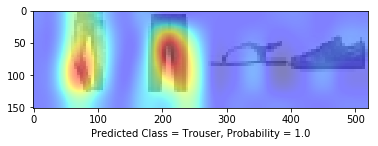

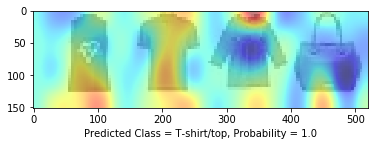

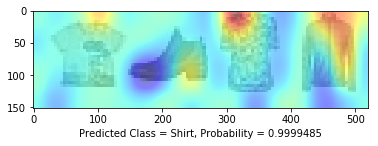

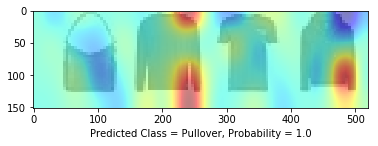

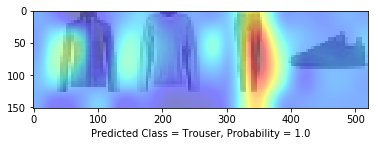

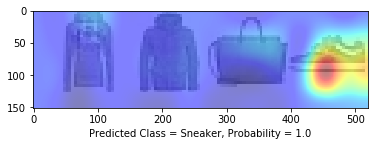

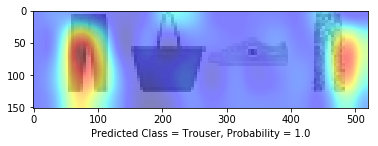

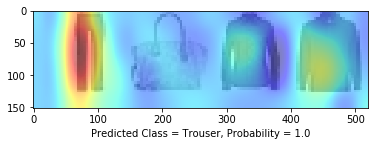

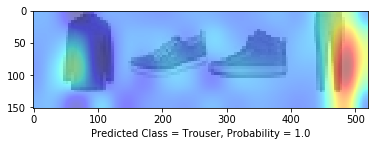

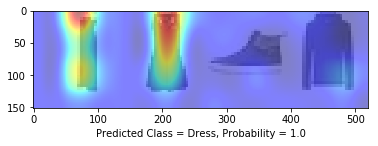

In [20]:
# import Numpy, Scipy, and Matplotlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# import Keras's functional api
from keras.models import Model

# get the weights from the last layer
gap_weights = model.layers[-1].get_weights()[0]

# create a new model to output the feature maps and the predicted labels
cam_model = Model(inputs=model.input, 
                    outputs=(model.layers[-3].output, model.layers[-1].output)) 

# make the prediction for a set of test images
features, results = cam_model.predict(test_img)

# check the prediction for 10 test images
for idx in range(10):   
    # get the feature map of the test image
    features_for_one_img = features[idx, :, :, :]

    # map the feature map to the original size
    height_roomout = train_img_size_h / features_for_one_img.shape[0]
    width_roomout = train_img_size_w / features_for_one_img.shape[1]
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
        
    # get the predicted label with the maximum probability
    pred = np.argmax(results[idx])
    
    # prepare the final display
    plt.figure(facecolor='white')
    
    # get the weights of class activation map
    cam_weights = gap_weights[:, pred]

    # create the class activation map
    cam_output = np.dot(cam_features, cam_weights)
    
    # draw the class activation map
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    buf = 'Predicted Class = ' + fashion_name[pred] + ', Probability = ' + str(results[idx][pred])
    plt.xlabel(buf)
    plt.imshow(t_pic[idx], alpha=0.5)
    plt.imshow(cam_output, cmap='jet', alpha=0.5)
     
    plt.show()  

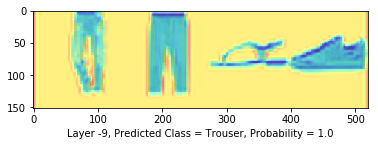

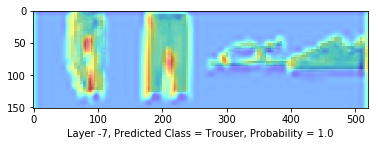

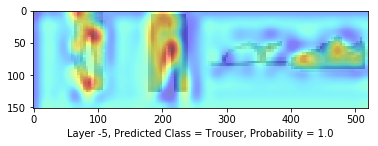

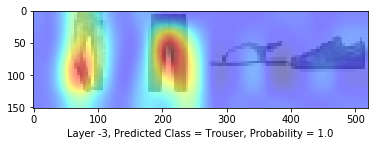

In [34]:
# import Numpy, Scipy, and Matplotlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# import Keras's functional api
from keras.models import Model

# get the weights from the last layer
gap_weights = model.layers[-1].get_weights()[0]

for i in range(9,2,-2):
    # create a new model to output the feature maps and the predicted labels
    cam_model = Model(inputs=model.input, 
                        outputs=(model.layers[-i].output, model.layers[-1].output)) 

    # make the prediction for a set of test images
    features, results = cam_model.predict(test_img)
    # check the prediction for 1 test images
    # get the feature map of the test image
    features_for_one_img = features[0, :, :, :]

    # map the feature map to the original size
    height_roomout = train_img_size_h / features_for_one_img.shape[0]
    width_roomout = train_img_size_w / features_for_one_img.shape[1]
    cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)

    # get the predicted label with the maximum probability
    pred = np.argmax(results[0])

    # prepare the final display
    plt.figure(facecolor='white')

    # get the weights of class activation map
    cam_weights = gap_weights[:, pred]

    # create the class activation map
    cam_output = np.dot(cam_features, cam_weights)

    # draw the class activation map
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    buf = 'Layer -'+str(i)+', Predicted Class = ' + fashion_name[pred] + ', Probability = ' + str(results[0][pred])
    plt.xlabel(buf)
    plt.imshow(t_pic[0], alpha=0.5)
    plt.imshow(cam_output, cmap='jet', alpha=0.5)

    plt.show()  

In [35]:
from keras.models import load_model

model.save('fashionmnist_model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')

In [37]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history

#save
with open('history.json', 'w') as fp:
    json.dump(str(history_dict), fp)